**Dataset : AT&T Database of Faces**


Link to Dataset: https://www.kaggle.com/datasets/kasikrit/att-database-of-faces


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import pathlib
import random

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
path = 'dataset2'
data_dir = pathlib.Path(path)

In [4]:
for (dirname, _, filenames) in os.walk(path, topdown=True):
  for filename in filenames:
    print(os.path.join(dirname, filename))

dataset2\README
dataset2\s1\1.pgm
dataset2\s1\1.png
dataset2\s1\10.png
dataset2\s1\2.png
dataset2\s1\3.png
dataset2\s1\4.png
dataset2\s1\5.png
dataset2\s1\6.png
dataset2\s1\7.png
dataset2\s1\8.png
dataset2\s1\9.png
dataset2\s10\1.png
dataset2\s10\10.png
dataset2\s10\2.png
dataset2\s10\3.png
dataset2\s10\4.png
dataset2\s10\5.png
dataset2\s10\6.png
dataset2\s10\7.png
dataset2\s10\8.png
dataset2\s10\9.png
dataset2\s11\1.png
dataset2\s11\10.png
dataset2\s11\2.png
dataset2\s11\3.png
dataset2\s11\4.png
dataset2\s11\5.png
dataset2\s11\6.png
dataset2\s11\7.png
dataset2\s11\8.png
dataset2\s11\9.png
dataset2\s12\1.png
dataset2\s12\10.png
dataset2\s12\2.png
dataset2\s12\3.png
dataset2\s12\4.png
dataset2\s12\5.png
dataset2\s12\6.png
dataset2\s12\7.png
dataset2\s12\8.png
dataset2\s12\9.png
dataset2\s13\1.png
dataset2\s13\10.png
dataset2\s13\2.png
dataset2\s13\3.png
dataset2\s13\4.png
dataset2\s13\5.png
dataset2\s13\6.png
dataset2\s13\7.png
dataset2\s13\8.png
dataset2\s13\9.png
dataset2\s14\1.png
da

In [5]:
print(data_dir)

dataset2


dataset2\s1\1.pgm


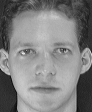

In [6]:
s1 = list(data_dir.glob('s1/*'))
print(s1[0])
PIL.Image.open(str(s1[0]))

In [7]:
from PIL import Image
import time
for i in range(1,41):
  for file in data_dir.glob('s{}/*'.format(i)):
    filename, extension  = os.path.splitext(file)
    if extension == ".pgm":
        new_file = "{}.png".format(filename)
        with Image.open(file) as im:
          im.save(new_file)
          im.close()
        time.sleep(0.1)
        try:
            os.remove(file)
        except Exception as e:
            print(f"Error deleting file {file}: {e}")

Error deleting file dataset2\s1\1.pgm: [WinError 32] The process cannot access the file because it is being used by another process: 'dataset2\\s1\\1.pgm'


dataset2\s1\8.png


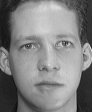

In [8]:
s1 = list(data_dir.glob('s1/*'))
print(s1[9])
PIL.Image.open(str(s1[9]))

In [16]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 40 classes.
Using 320 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 40 classes.
Using 80 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


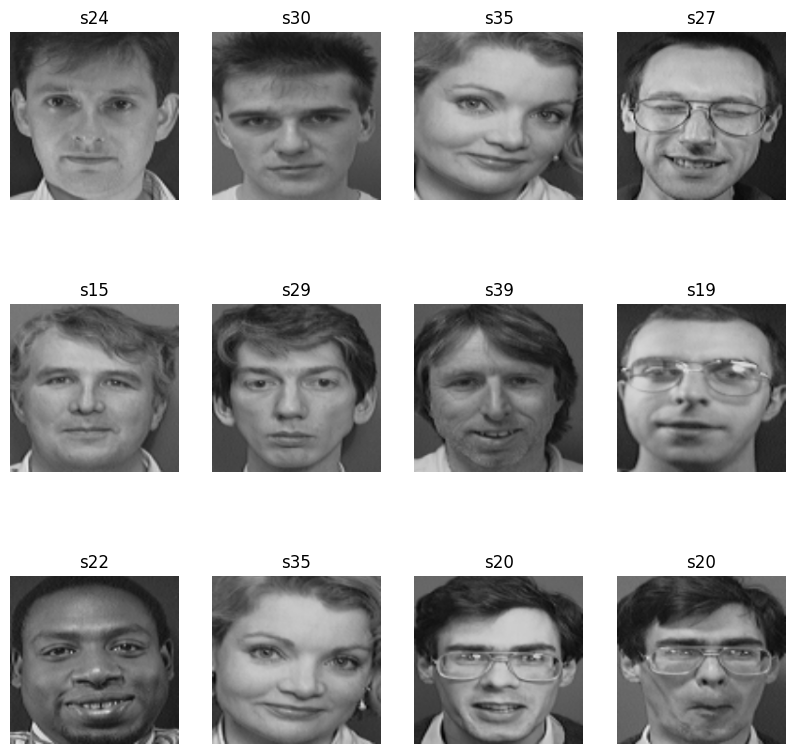

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=40,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(180, activation='relu'))
resnet_model.add(Dense(40, activation='softmax'))

In [21]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 180)              368820    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 40)               7240      
 pper)                                                           
                                                                 
Total params: 23,963,772
Trainable params: 376,060
Non-trainable params: 23,587,712
______________________________________

In [22]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 3.6184 - accuracy: 0.1125 - val_loss: 2.9521 - val_accuracy: 0.3375
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 2.2523 - accuracy: 0.5344 - val_loss: 1.8816 - val_accuracy: 0.6750
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 1.2110 - accuracy: 0.8531 - val_loss: 1.2032 - val_accuracy: 0.8375
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.6389 - accuracy: 0.9625 - val_loss: 0.7787 - val_accuracy: 0.9375
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.3536 - accuracy: 0.9812 - val_loss: 0.5794 - val_accuracy: 0.9250
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.2070 - accuracy: 0.9969 - val_loss: 0.4027 - val_accuracy: 0.9750
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 0.1339 - accuracy: 0.9969 - val_loss: 0.3074 - val_accuracy: 0.9625
Epoch 8/10
10/10 [==

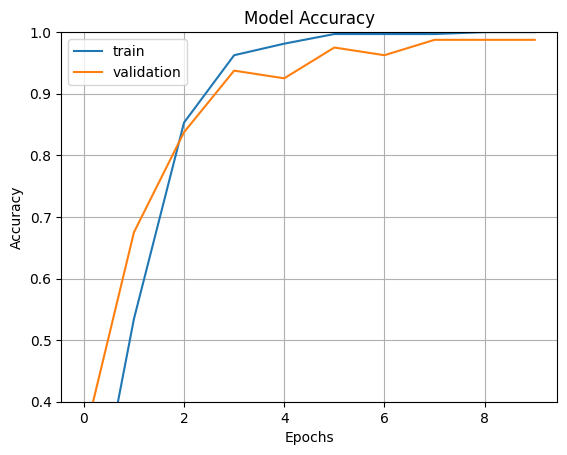

In [24]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

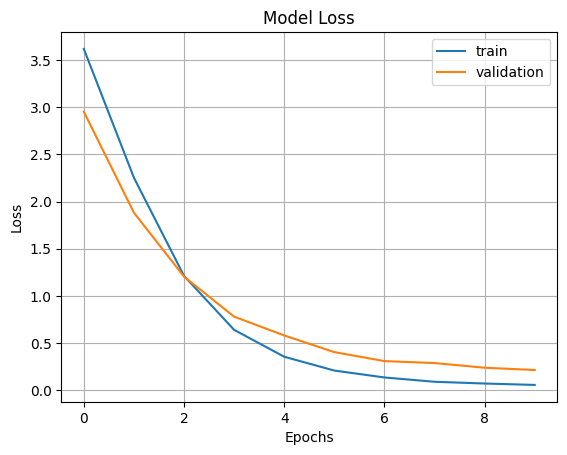

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [26]:
tf.keras.models.save_model(resnet_model, 'resnet_model.pkl')

INFO:tensorflow:Assets written to: resnet_model.pkl\assets


INFO:tensorflow:Assets written to: resnet_model.pkl\assets
